In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.impute import SimpleImputer 
from sklearn.impute import KNNImputer
import random


from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import folium
from folium import plugins
from folium.plugins import HeatMap

In [2]:
df_Kiev = pd.read_csv("Kiev.csv")
#df_DC = df_DC.loc[df_DC['price'] < 400]
df_Kiev = df_Kiev.drop(columns=["id"])
df_Kiev = df_Kiev[df_Kiev["room_type"]=="Entire home/apt"]

df_Kiev

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Entire home/apt,40,2,111,"9,25",106,365
1,Entire home/apt,23,2,64,"5,33",6,170
2,Entire home/apt,24,2,13,"1,08",22,31
3,Entire home/apt,24,1,130,"10,83",8,15
4,Entire home/apt,32,3,108,"9,00",30,258
...,...,...,...,...,...,...,...
165,Entire home/apt,32,1,67,"5,58",47,54
166,Entire home/apt,54,2,31,"2,58",14,114
167,Entire home/apt,62,1,0,"0,00",2,54
168,Entire home/apt,40,2,0,"0,00",1,365


In [3]:
df_Kiev.reviews_per_month = df_Kiev.reviews_per_month.str.replace(',','.',regex=True)
df_Kiev.reviews_per_month = pd.to_numeric(df_Kiev["reviews_per_month"])
df_Kiev

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Entire home/apt,40,2,111,9.25,106,365
1,Entire home/apt,23,2,64,5.33,6,170
2,Entire home/apt,24,2,13,1.08,22,31
3,Entire home/apt,24,1,130,10.83,8,15
4,Entire home/apt,32,3,108,9.00,30,258
...,...,...,...,...,...,...,...
165,Entire home/apt,32,1,67,5.58,47,54
166,Entire home/apt,54,2,31,2.58,14,114
167,Entire home/apt,62,1,0,0.00,2,54
168,Entire home/apt,40,2,0,0.00,1,365


In [4]:
def remove_outlier(df):
    col = list(df._get_numeric_data().columns)
    #col.remove('latitude')
    #col.remove('longitude')
    for col_names in col:
        df[col_names] = df[col_names].apply(lambda y: np.log(y) if y > 0 else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() if y > df[col_names].mean()+3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = np.exp(df[col_names])
    return df

df_Kiev = remove_outlier(df_Kiev)

In [5]:
df_Kiev.dtypes

room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object

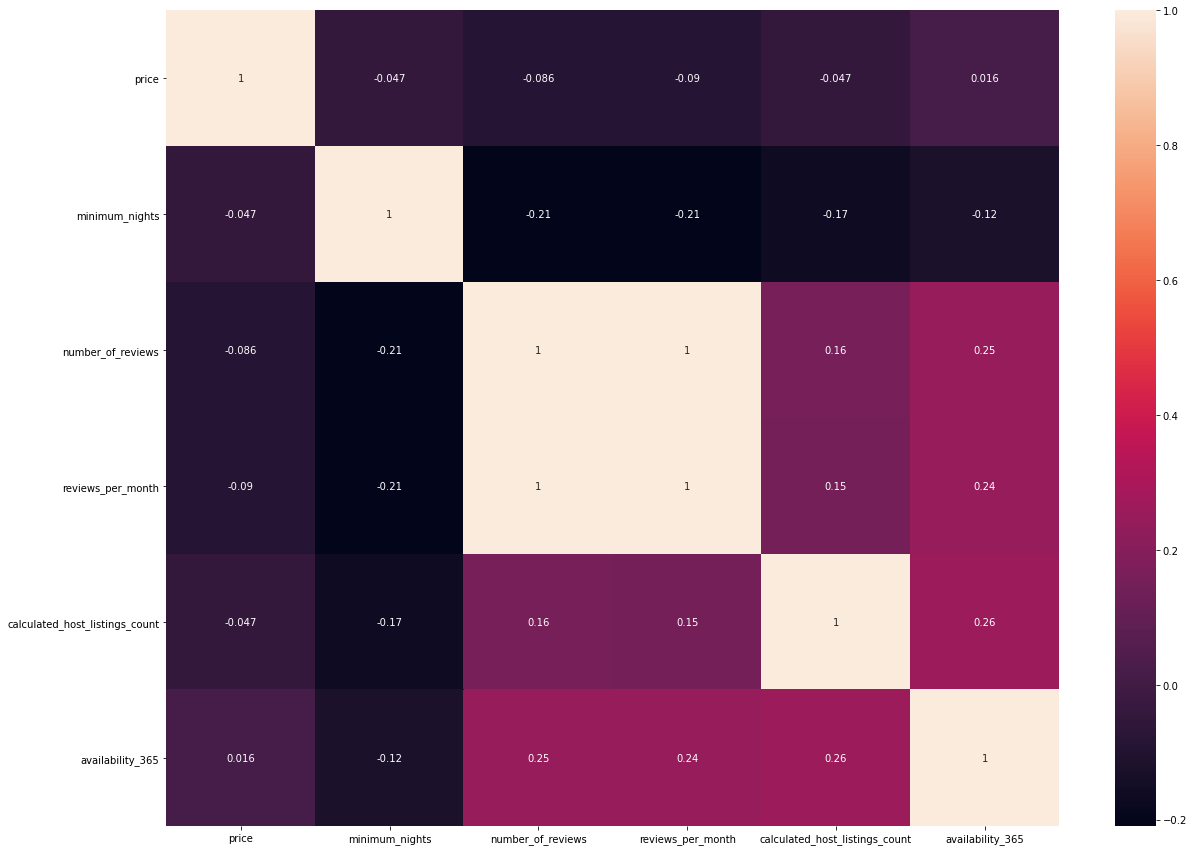

In [6]:
corrmat = df_Kiev[df_Kiev._get_numeric_data().columns].corr().round(7)
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, annot=True)
plt.show()

In [7]:
df_Kiev["city"] = "Kiev"

In [8]:
df = pd.read_csv("DC-Madrid.csv")

df = pd.concat([df, df_Kiev])


In [9]:
df.groupby('city').aggregate('mean').round()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
city,,,,,,
Kiev,36.0,2.0,53.0,4.0,32.0,191.0
Madrid,65.0,2.0,37.0,2.0,3.0,143.0
"Washington, D.C.",119.0,2.0,41.0,1.0,2.0,109.0


In [10]:
df.groupby('city').aggregate('median').round()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
city,,,,,,
Kiev,34.0,1.0,28.0,2.0,17.0,164.0
Madrid,60.0,2.0,19.0,1.0,1.0,108.0
"Washington, D.C.",99.0,2.0,20.0,1.0,1.0,47.0


H:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

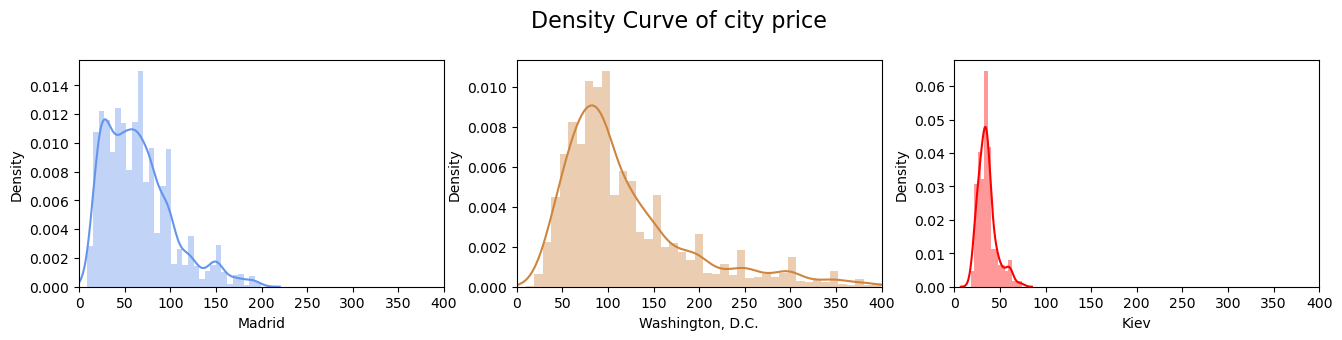

In [11]:
x1 = df.loc[df.city=='Madrid', 'price']
x2 = df.loc[df.city=='Washington, D.C.', 'price']
x3 = df.loc[df.city=='Kiev', 'price']


# plot
fig, axes = plt.subplots(1, 3, figsize=(16, 3), sharex = True, dpi=100)
sns.distplot(x1 , color="cornflowerblue", ax=axes[0], axlabel='Madrid')
sns.distplot(x2 , color="peru", ax=axes[1], axlabel='Washington, D.C.')
sns.distplot(x3 , color="red", ax=axes[2], axlabel='Kiev')

plt.suptitle('Density Curve of city price', y=1.05, size=16)
plt.xlim(0,400);

H:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

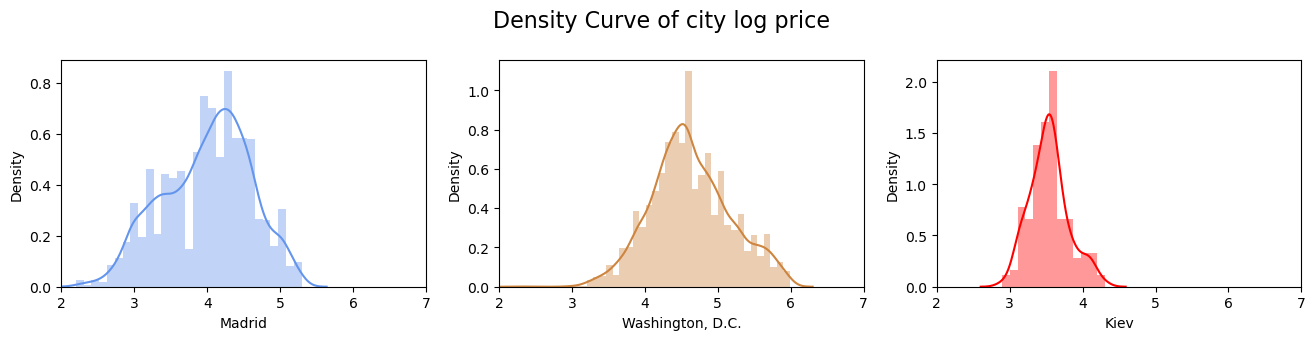

In [12]:
x1 = np.log(df.loc[df.city=='Madrid', 'price'])
x2 = np.log(df.loc[df.city=='Washington, D.C.', 'price'])
x3 = np.log(df.loc[df.city=='Kiev', 'price'])


# plot
fig, axes = plt.subplots(1, 3, figsize=(16, 3), sharex = True, dpi=100)
sns.distplot(x1 , color="cornflowerblue", ax=axes[0], axlabel='Madrid')
sns.distplot(x2 , color="peru", ax=axes[1], axlabel='Washington, D.C.')
sns.distplot(x3 , color="red", ax=axes[2], axlabel='Kiev')

plt.suptitle('Density Curve of city log price', y=1.05, size=16)
plt.xlim(2,7);

<AxesSubplot:xlabel='room_type', ylabel='count'>

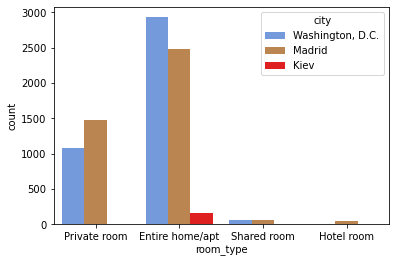

In [20]:
sns.countplot(x="room_type", hue="city", data=df, palette= ["cornflowerblue", "peru", "red"])
#sns.set_theme(style="brightgrid")
#sns.color_palette("husl", 9)


In [75]:
df.groupby(['city','room_type']).aggregate({'room_type':'count', 'price':'mean', 'number_of_reviews':'mean', 
                                            'reviews_per_month':'mean','calculated_host_listings_count':'mean' ,
                                            'availability_365':'mean'}).round()

room_type  price  number_of_reviews  \
city             room_type                                              
Kiev             Entire home/apt        166   36.0               53.0   
Madrid           Entire home/apt       2484   82.0               44.0   
                 Hotel room              44   71.0               28.0   
                 Private room          1475   36.0               28.0   
                 Shared room             67   25.0               26.0   
Washington, D.C. Entire home/apt       2929  134.0               44.0   
                 Hotel room               8  186.0               41.0   
                 Private room          1076   80.0               33.0   
                 Shared room             57   53.0               14.0   

                                  reviews_per_month  \
city             room_type                            
Kiev             Entire home/apt                4.0   
Madrid           Entire home/apt                2.0   
                 Hotel room                     1.0   
                 Private room                   2.0   
                 Shared room                    1.0   
Washington, D.C. Entire home/apt                2.0   
                 Hotel room                     1.0   
                 Private room                   1.0   
                 Shared room                    1.0   

                                  calculated_host_listings_count  \
city             room_type                                         
Kiev             Entire home/apt                            32.0   
Madrid           Entire home/apt                             4.0   
                 Hotel room                                  8.0   
                 Private room                                3.0   
                 Shared room                                 7.0   
Washington, D.C. Entire home/apt                             2.0   
                 Hotel room                                  9.0   
                 Private room                                3.0   
                 Shared room                                 4.0   

                                  availability_365  
city             room_type                          
Kiev             Entire home/apt             191.0  
Madrid           Entire home/apt             146.0  
                 Hotel room                  204.0  
                 Private room                134.0  
                 Shared room                 217.0  
Washington, D.C. Entire home/apt             105.0  
                 Hotel room                  294.0  
                 Private room                119.0  
                 Shared room                 126.0

H:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

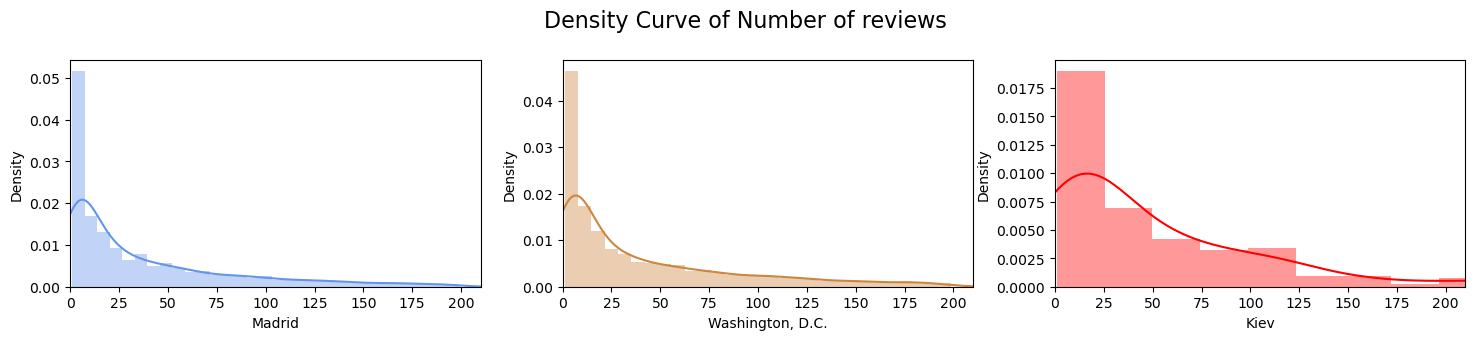

In [79]:
x1 = df.loc[df.city=='Madrid', 'number_of_reviews']
x2 = df.loc[df.city=='Washington, D.C.', 'number_of_reviews']
x3 = df.loc[df.city=='Kiev', 'number_of_reviews']


# plot
fig, axes = plt.subplots(1, 3, figsize=(18, 3), sharex = True, dpi=100)
sns.distplot(x1 , color="cornflowerblue", ax=axes[0], axlabel='Madrid')
sns.distplot(x2 , color="peru", ax=axes[1], axlabel='Washington, D.C.')
sns.distplot(x3 , color="red", ax=axes[2], axlabel='Kiev')
plt.suptitle('Density Curve of Number of reviews', y=1.05, size=16)

plt.xlim(0,210);


H:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
H:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

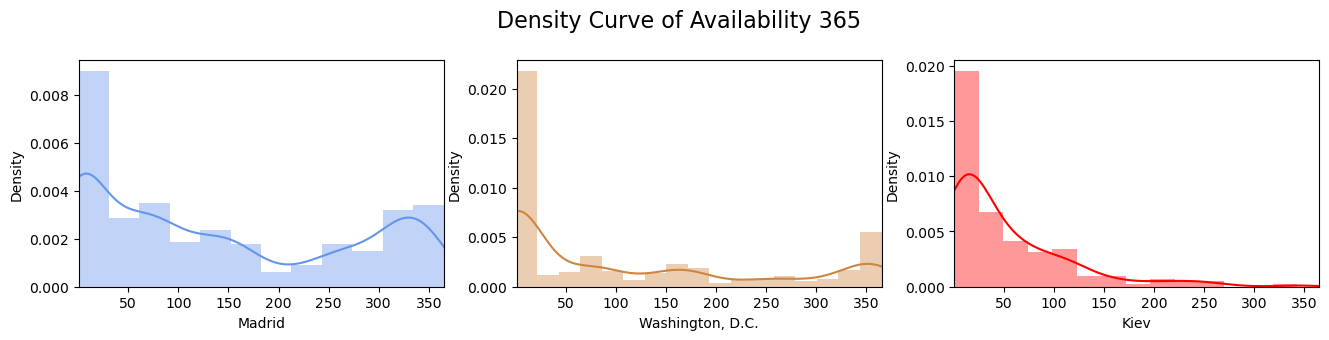

In [46]:
x1 = df.loc[df.city=='Madrid', 'availability_365']
x2 = df.loc[df.city=='Washington, D.C.', 'availability_365']
x3 = df.loc[df.city=='Kiev', 'number_of_reviews']
# plot
fig, axes = plt.subplots(1, 3, figsize=(16, 3), sharex=True, dpi=100)
sns.distplot(x1 , color="cornflowerblue", ax=axes[0], axlabel='Madrid')
sns.distplot(x2 , color="peru", ax=axes[1], axlabel='Washington, D.C.')
sns.distplot(x3 ,color="red", ax=axes[2], axlabel='Kiev')
plt.suptitle('Density Curve of Availability 365', y=1.05, size=16)

plt.xlim(1,365);


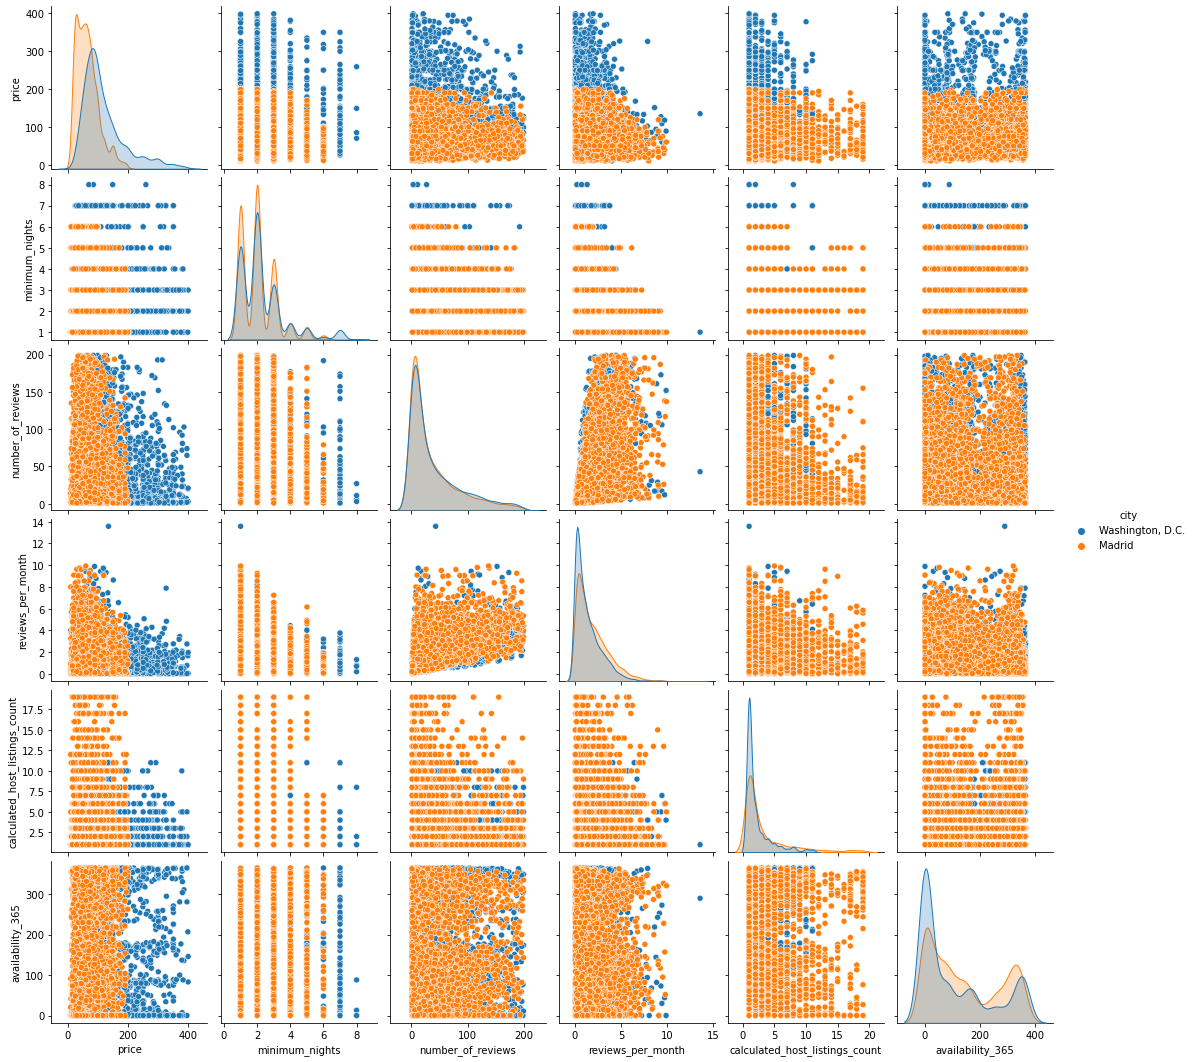

In [18]:
sns.pairplot(df[df["city"] != "Kiev"], hue="city", height=2.5)

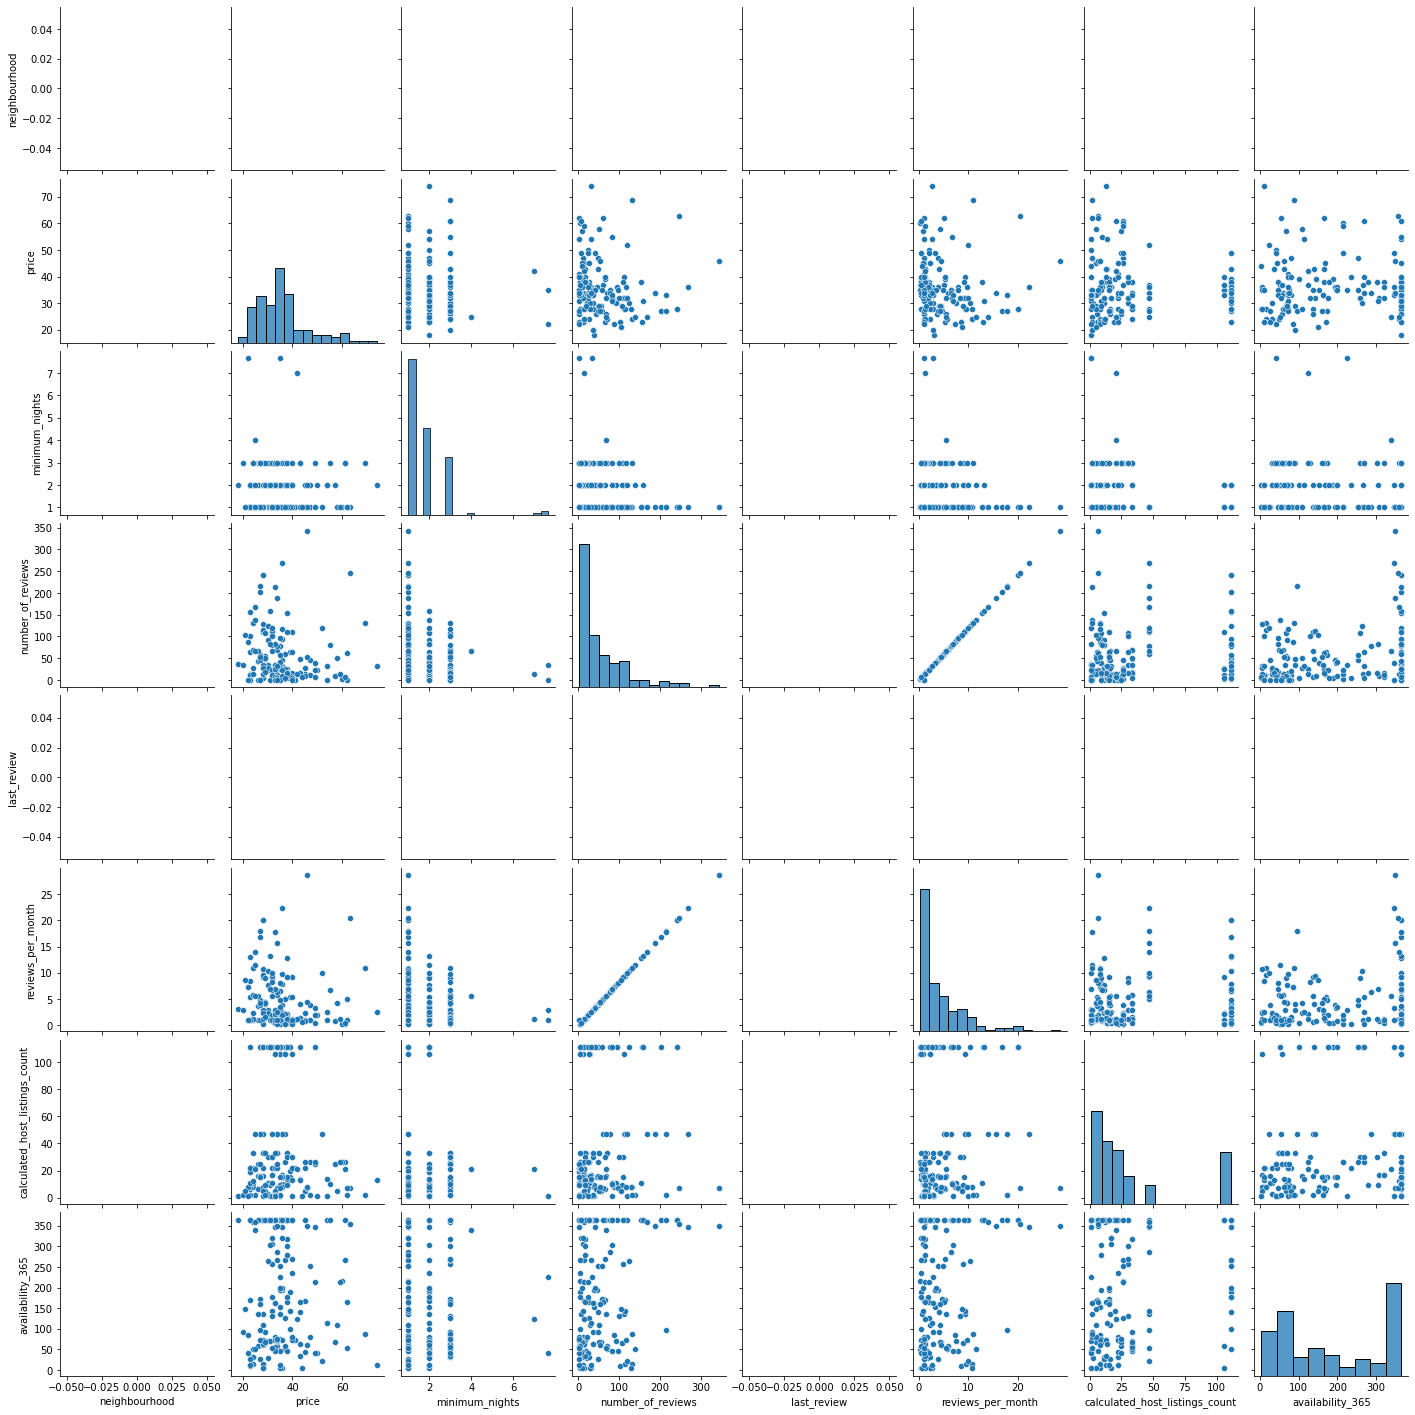

In [19]:
sns.pairplot(df[df["city"] == "Kiev"], height=2.5)

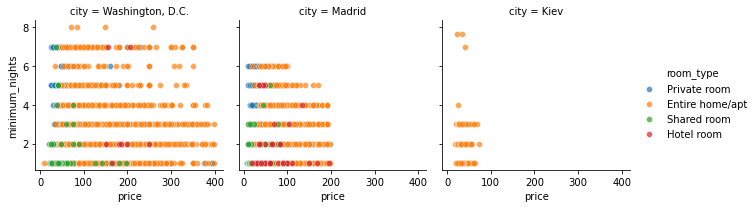

In [14]:
g = sns.FacetGrid(df, col="city", hue="room_type")
g.map(sns.scatterplot, "price", "minimum_nights", alpha=.7)
g.add_legend()

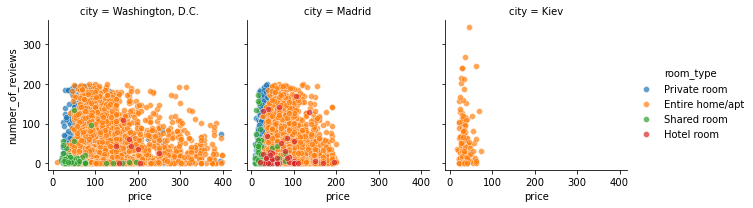

In [15]:
g = sns.FacetGrid(df, col="city", hue="room_type")
g.map(sns.scatterplot, "price", "number_of_reviews", alpha=.7)
g.add_legend()

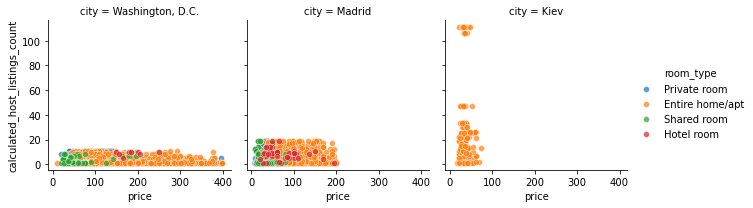

In [16]:
g = sns.FacetGrid(df, col="city", hue="room_type")
g.map(sns.scatterplot, "price", "calculated_host_listings_count", alpha=.7)
g.add_legend()

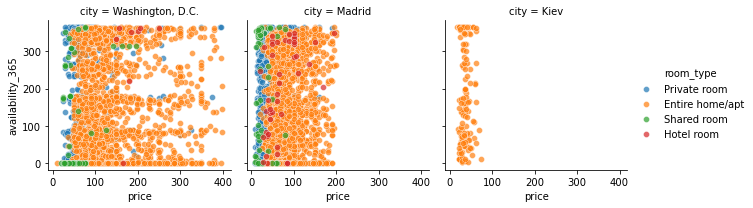

In [17]:
g = sns.FacetGrid(df, col="city", hue="room_type")
g.map(sns.scatterplot, "price", "availability_365", alpha=.7)
g.add_legend()